In [ ]:
import yfinance as yf


In [ ]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

In [ ]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

In [ ]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = pd.read_html(str(table))[0]
        break

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(inplace=True)

gme_revenue.tail()

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_graph(data, title):
    plt.figure(figsize=(12, 5))
    plt.plot(data["Date"], data["Close"], color='blue')  
    plt.title(title)
    plt.xlabel("Date") 
    plt.ylabel("Closing Price USD") 
    plt.grid(True)
    plt.show()

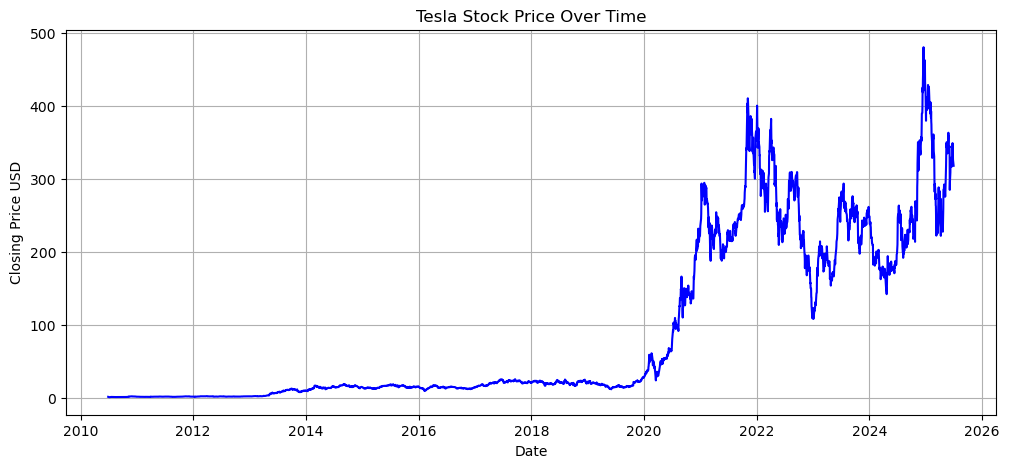

In [31]:
make_graph(tesla_data, "Tesla Stock Price Over Time")

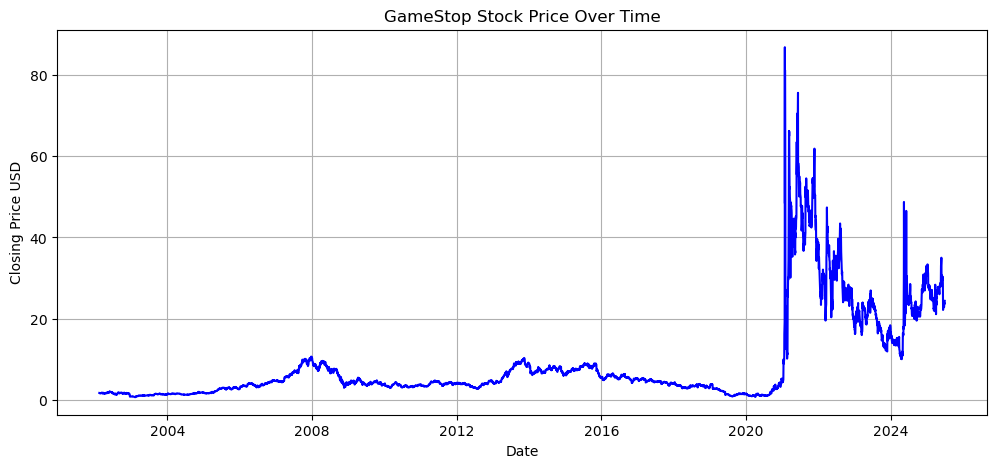

In [32]:
make_graph(gme_data, "GameStop Stock Price Over Time")